In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [2]:
def read_csv ( csv_path ):
    np_path_XYs = np . genfromtxt ( csv_path , delimiter = ',')
    path_XYs = []
    for i in np . unique ( np_path_XYs [: , 0]):
        npXYs = np_path_XYs [ np_path_XYs [: , 0] == i ][: , 1:]
        XYs = []
        for j in np . unique ( npXYs [: , 0]):
            XY = npXYs [ npXYs [: , 0] == j ][: , 1:]
            XYs . append ( XY )
        path_XYs . append ( XYs )
    return path_XYs

In [3]:
def plot(paths_XYs):
    colours = ['white']
    fig, ax = plt.subplots(tight_layout=True, figsize=(1,1))
    
    # Set the background color of the figure and axes to black
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:,0], XY[:,1], c=c, linewidth=2)
    
    ax.set_aspect('equal')
    
    # Hide the axis
    ax.axis('off')
    
    # Save the plot with a random filename
    if not os.path.exists('savedImages'):
        os.makedirs('savedImages')
    
    plt.savefig(f'savedImages/{random.random()}.png', facecolor=fig.get_facecolor())
    plt.show()

    return plt

In [4]:
read_csv('problems/frag0.csv')

[[array([[ 41.94200134,  68.98000336],
         [ 41.25960541,  69.81170654],
         [ 40.58875275,  70.65237427],
         [ 39.92960739,  71.50195312],
         [ 39.28233719,  72.36040497],
         [ 38.6471138 ,  73.22766876],
         [ 38.02410889,  74.10371399],
         [ 37.4134903 ,  74.98847961],
         [ 36.81542969,  75.88191986],
         [ 36.23009109,  76.78398895],
         [ 35.65765381,  77.69464874],
         [ 35.09827805,  78.6138382 ],
         [ 34.55213928,  79.54151917],
         [ 34.01940155,  80.47764587],
         [ 33.50024414,  81.42215729],
         [ 32.99482727,  82.37502289],
         [ 32.50332642,  83.33618164],
         [ 32.02590561,  84.30560303],
         [ 31.56274223,  85.28321838],
         [ 31.11400032,  86.26899719],
         [ 30.73366356,  87.13911438],
         [ 30.36473846,  88.0182724 ],
         [ 30.00725937,  88.90615845],
         [ 29.6612606 ,  89.80249023],
         [ 29.3267765 ,  90.70696259],
         [ 29.00383949,  

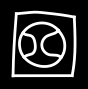

<module 'matplotlib.pyplot' from 'C:\\Users\\PRATAP\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [5]:
plot(read_csv('problems/frag1.csv'))

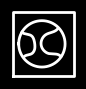

<module 'matplotlib.pyplot' from 'C:\\Users\\PRATAP\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [6]:
plot(read_csv('problems/frag01_sol.csv'))

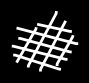

<module 'matplotlib.pyplot' from 'C:\\Users\\PRATAP\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
plot(read_csv('problems/frag2.csv'))

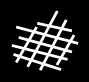

<module 'matplotlib.pyplot' from 'C:\\Users\\PRATAP\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [8]:
plot(read_csv('problems/frag2_sol.csv'))

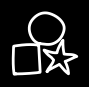

<module 'matplotlib.pyplot' from 'C:\\Users\\PRATAP\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [9]:
plot(read_csv('problems/isolated.csv'))

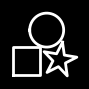

<module 'matplotlib.pyplot' from 'C:\\Users\\PRATAP\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [10]:
plot(read_csv('problems/isolated_sol.csv'))

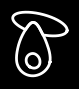

<module 'matplotlib.pyplot' from 'C:\\Users\\PRATAP\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [11]:
plot(read_csv('problems/occlusion1.csv'))

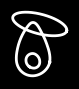

<module 'matplotlib.pyplot' from 'C:\\Users\\PRATAP\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [12]:
plot(read_csv('problems/occlusion1_sol.csv'))

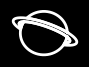

<module 'matplotlib.pyplot' from 'C:\\Users\\PRATAP\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [13]:
plot(read_csv('problems/occlusion2.csv'))

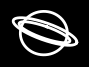

<module 'matplotlib.pyplot' from 'C:\\Users\\PRATAP\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [14]:
plot(read_csv('problems/occlusion2_sol.csv'))

In [15]:
len(read_csv('problems/frag0.csv')[0][0])

94

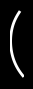

<module 'matplotlib.pyplot' from 'C:\\Users\\PRATAP\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [16]:
plot([read_csv('problems/frag0.csv')[0]])

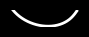

<module 'matplotlib.pyplot' from 'C:\\Users\\PRATAP\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
plot([read_csv('problems/frag0.csv')[1]])

In [18]:
import cv2

In [19]:
img = cv2.imread('savedImages/img0.5292646152873881.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
plt.imshow(img)

In [ ]:
ret, thrash = cv2.threshold(img, 217 , 255, cv2.CHAIN_APPROX_NONE)
contours1 , hierarchy = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.001* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        x, y , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio < 1.05:
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        else:
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

In [ ]:
plt.imshow(img)

In [ ]:
contours[0]

In [ ]:
cont1 = contours[0]

In [ ]:
cont1.shape

In [ ]:
cont1 = cont1.reshape(1170,2)

In [ ]:
[cont1]

In [ ]:
plot([[contours[5].reshape(len(contours[5]), 2)]])

In [ ]:
read_csv('problems/frag0.csv')

In [ ]:
ellipse = cv2.fitEllipse(contours[5])

In [ ]:
contours = read_csv('problems/isolated.csv')

In [ ]:
img = np.ones((1000,1000))

In [ ]:
for contour in contours:
    print(contour)

In [ ]:
shapes = []
for cont in contours:
    contour = np.array(cont, dtype = np.float32)
    contour = contour[0].reshape(len(contour[0]),1,2)
    approx = cv2.approxPolyDP(contour, 0.02* cv2.arcLength(contour, True), True)
    approx = np.array(approx, dtype = np.int32)
    print(approx)
    cv2.drawContours(img, approx, 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        shapes.append("Triangle")
        cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        x, y , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio < 1.05:
            shapes.append("Square")
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

        else:
            shapes.append("Rectangle")
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

    elif len(approx) == 5 :
        shapes.append("pentagon")
        cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10 :
        shapes.append("star")
        cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        shapes.append("circle")
        cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

In [ ]:
plt.imshow(img)

In [ ]:
approx

In [ ]:
cv2.polylines(img, [approx], isClosed=True, color=(255, 255, 0), thickness=100)

In [ ]:
plt.imshow(img)

In [ ]:
img = plot(read_csv('problems/isolated.csv'))

In [ ]:
img = np.ones((300,300))

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
contours = read_csv('problems/isolated.csv')

In [ ]:
import cv2
import numpy as np

shapes = []

for cont in contours:
    contour = np.array(cont, dtype=np.float32)
    contour = contour[0].reshape(-1, 1, 2)
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    approx = np.array(approx, dtype=np.int32)
    print(approx)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5

    if len(approx) == 3:
        shapes.append("Triangle")
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w) / h
        print(aspectRatio)
        if 0.95 <= aspectRatio < 1.05:
            shapes.append("Square")
            cv2.putText(img, "Square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            img = cv2.polylines(img, [approx], isClosed=True, color=(255, 255, 0), thickness=1)
        else:
            shapes.append("Rectangle")
            cv2.putText(img, "Rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            img = cv2.polylines(img, [approx], isClosed=True, color=(255, 255, 0), thickness=1)
    elif len(approx) == 5:
        shapes.append("Pentagon")
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        img = cv2.polylines(img, [approx], isClosed=True, color=(255, 255, 0), thickness=1)
    elif len(approx) == 10:
        shapes.append("Star")
        cv2.putText(img, "Star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        img = cv2.polylines(img, [approx], isClosed=True, color=(255, 255, 0), thickness=1)
    else:
        if len(contour) >= 5:
            ellipse = cv2.fitEllipse(contour)
            (center, axes, orientation) = ellipse
            major_axis_length = max(axes)
            minor_axis_length = min(axes)
            aspect_ratio = minor_axis_length / major_axis_length
            if aspect_ratio > 0.9:
                shapes.append("Circle")
                cv2.putText(img, "Circle", (int(center[0]), int(center[1])), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
                cv2.circle(img, (int(center[0]), int(center[1])), int(major_axis_length / 2), (255, 255, 0), 1)
            else:
                shapes.append("Ellipse")
                cv2.putText(img, "Ellipse", (int(center[0]), int(center[1])), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
                cv2.ellipse(img, ellipse, (255, 255, 0), 1)
        else:
            shapes.append("Irregular")
            cv2.putText(img, "Irregular", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

In [ ]:
plt.imshow(img)

In [ ]:
shapes